## Snapchat Filter Challenge
- Take an image
- Find the eyes and the nose
- Apply glasses and mustaches accordingly on the image

In [26]:
# Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Defining classifiers
nose_cascade = cv2.CascadeClassifier("cascades/nose.xml")
eyes_cascade = cv2.CascadeClassifier("cascades/eyes.xml")

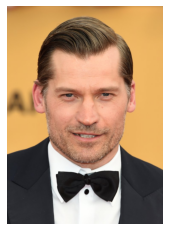

In [28]:
# Reading the training image
img = cv2.imread("train/Jamie_Before.jpg", -1)
rgbImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgbImage)
plt.axis("off")
plt.show()

In [29]:
# Function for showing image
def showImage(img):
    rgbImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(rgbImage)
    plt.axis("off")
    plt.show()  

#### Trying to identify the nose and eyes of the image

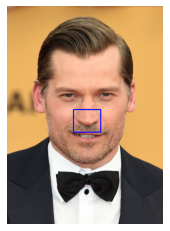

In [30]:
# Nose
for nose in nose_cascade.detectMultiScale(img, 1.3, 5):

    x,y,w,h = nose
    nose_detected = np.copy(img)
    cv2.rectangle(nose_detected, (x,y), (x+w, y+h), (255,0,0), 3)

    showImage(nose_detected)


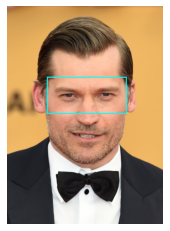

In [31]:
# Eyes
for eyes in eyes_cascade.detectMultiScale(img, 1.3, 5):

    x,y,w,h = eyes
    eyes_detected = np.copy(img)
    cv2.rectangle(eyes_detected, (x,y), (x+w, y+h), (255,255,0), 3)

    showImage(eyes_detected)

Now that we have detected both, we try to put the accessories

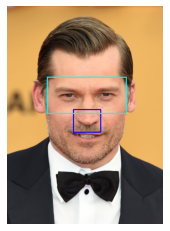

In [32]:
modified_image = np.copy(img)

for nose in nose_cascade.detectMultiScale(img, 1.3, 5):

    x,y,w,h = nose
    cv2.rectangle(modified_image, (x,y), (x+w, y+h), (255,0,0), 3)

for eyes in eyes_cascade.detectMultiScale(img, 1.3, 5):

    x,y,w,h = eyes
    cv2.rectangle(modified_image, (x,y), (x+w, y+h), (255,255,0), 3)

    
showImage(modified_image)

In [33]:
# Saving the accessories
mustache_image = cv2.imread("assets/mustache.png", -1)
glasses_image = cv2.imread("assets/glasses.png", -1)


In [34]:
# Resize function
def resizeImage(img, height = None, width = None):
    (h, w) = img.shape[:2]

    if height is None:

        return cv2.resize(img, (width, int(width * h/w)))

    if width is None:

        return cv2.resize(img, (int(height * w/h), height))

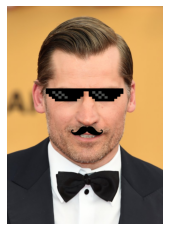

In [39]:
# Pasting the accessories
modified_image = np.copy(img)

for nose in nose_cascade.detectMultiScale(img, 1.3, 5):

    x,y,w,h = nose
    # cv2.rectangle(modified_image, (x,y), (x+w, y+h), (255,0,0), 3)
    noseOffset = 20
    mustache_image = resizeImage(mustache_image, width=w+noseOffset)

    for i in range(mustache_image.shape[0]):
        for j in range(mustache_image.shape[1]):
            if mustache_image[i][j][3] > 0:
                modified_image[y + 3*h//5 + i, x+j - noseOffset//2, :] = mustache_image[i, j, :3]
    

for eyes in eyes_cascade.detectMultiScale(img, 1.3, 5):

    x,y,w,h = eyes
    eyesOffset = 0
    glasses_image = resizeImage(glasses_image, width=w+eyesOffset)

    for i in range(glasses_image.shape[0]):
        for j in range(glasses_image.shape[1]):
            if glasses_image[i][j][3] > 0:
                modified_image[y + i, x+j - noseOffset//2, :] = glasses_image[i, j, :3]
    # cv2.rectangle(modified_image, (x,y), (x+w, y+h), (255,255,0), 3)

    
showImage(modified_image)

#### Working on test data set

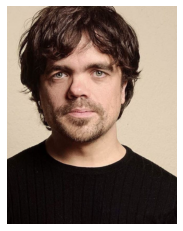

In [40]:
test_img = cv2.imread("test/Before.png")
showImage(test_img)

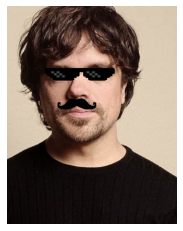

In [48]:
modified_image = np.copy(test_img)

for nose in nose_cascade.detectMultiScale(test_img, 1.3, 5):

    x,y,w,h = nose
    # cv2.rectangle(modified_image, (x,y), (x+w, y+h), (255,0,0), 3)
    noseOffset = 25
    mustache_image = resizeImage(mustache_image, width=w+noseOffset)

    for i in range(mustache_image.shape[0]):
        for j in range(mustache_image.shape[1]):
            if mustache_image[i][j][3] > 0:
                modified_image[y + 3*h//5 + i, x+j - noseOffset//2, :] = mustache_image[i, j, :3]
    

for eyes in eyes_cascade.detectMultiScale(test_img, 1.3, 5):

    x,y,w,h = eyes
    eyesOffset = 25
    glasses_image = resizeImage(glasses_image, width=w+eyesOffset)

    for i in range(glasses_image.shape[0]):
        for j in range(glasses_image.shape[1]):
            if glasses_image[i][j][3] > 0:
                modified_image[y + i, x+j - eyesOffset//2, :] = glasses_image[i, j, :3]
    # cv2.rectangle(modified_image, (x,y), (x+w, y+h), (255,255,0), 3)

    
showImage(modified_image)

#### Saving to csv

In [49]:
import pandas as pd

In [52]:
df = pd.DataFrame(modified_image.reshape(-1, 3), columns=["Channel 1", "Channel 2", "Channel 3"])
df.head()

,Channel 1,Channel 2,Channel 3
0,180,202,219
1,181,203,220
2,180,202,219
3,181,203,220
4,180,202,219


In [53]:
df.shape

(182845, 3)

The shape is similar to the sample submission, hence we are on the right track

In [55]:
# Finally saving it to file
df.to_csv("output.csv", index=False)